## Feature Engineering Using Titanic train Dataset

In [1]:
#Import the necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
# Import seaborn
import seaborn as sns
%matplotlib inline

In [2]:
#import the dataset
df = pd.read_csv('Titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
#Printing the datatype
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
# print the shape of the dataset (the number of columns,columns name and rows)
print(df.shape)
print(df.columns)

(891, 12)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


# Handling Missing values (NaN)

In [6]:
# Handling Missing values (NaN)
#print(df.isna())
## To get summary of null values in each column
print(df.isna().sum())
#print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [7]:
#Filling the missing values with the mean of Age column
col = df['Age']
#print(type(col))
print(df['Age'].mean())
#print(col.mean())

29.69911764705882


In [8]:
## Filling missing value with the mean of Age column in all rows 
#EXAMPLE....df['Age'].fillna(value = 50)....To fill missing value with your desired, approved or agreed value..e.g 50. 
#df['Age'].fillna(value = 'missing')
df['Age'].fillna(value = df['Age'].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [9]:
# df['Age'].fillna(value = df['Age'].mode())...To also fill NAN value with the mode value
#printing the tail, ten rows of the dataset
df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [10]:
#Changing the dataframe of Age column
df['Age'] = df['Age'].fillna(value = df['Age'].mean())
df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.000000,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.000000,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.000000,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.000000,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.000000,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.000000,0,0,370376,7.7500,NaN,Q


In [11]:
#checking for the missing value
print(df.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [12]:
### View Value_Counts of Embarked column
print(df['Embarked'].value_counts())

### Get mode value
mod_value = df['Embarked'].mode()

### As it returns a series, Filling the missing value
print(type(df['Embarked'].mode()))
### Display mode value using this
print(mod_value[0])

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64
<class 'pandas.core.series.Series'>
S


In [13]:
### Assign mode value at null positions in 'Embarked' column
df['Embarked'] = df['Embarked'].fillna(value = mod_value[0])

### Verify
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [16]:
## To drop columns with missing values.....i.e Cabin column
## To drop columns with missing values permanently
# df.dropna(inplace=True)
print(df.shape)
df.dropna(axis=1,inplace=True)
df

(891, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [17]:
#Checking the columns for NAN
print(df.shape)
print(df.isnull().sum())

(891, 11)
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [18]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


# Handling Outliers

In [19]:
# Handling Outliers
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   13.002015    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   29.699118    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [20]:
#For Fare and Age column
df.describe()[['Fare', 'Age']]

,Fare,Age
count,891.000000,891.000000
mean,32.204208,29.699118
std,49.693429,13.002015
min,0.000000,0.420000
25%,7.910400,22.000000
50%,14.454200,29.699118
75%,31.000000,35.000000
max,512.329200,80.000000


# Outlier Detection

<Axes: ylabel='Fare'>

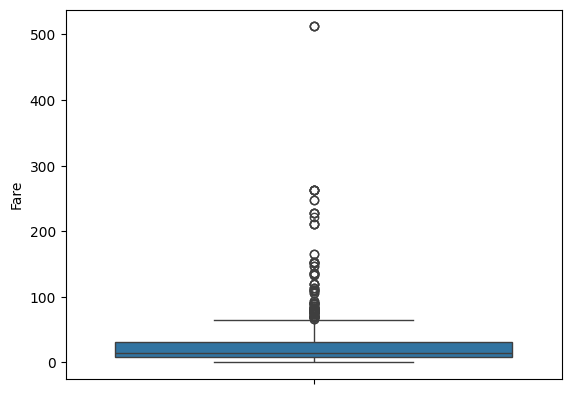

In [21]:
# sns.displot(df['Fare'], kde= False, bins = 20)
sns.boxplot(y='Fare', data= df )

In [22]:
## To get Position of the Outlier (i.e. Indices)
print(np.where(df['Fare']>85))
fare_ind = np.where(df['Fare']>85)
print(type(fare_ind))
print(len(fare_ind[0]))

(array([ 27,  31,  88, 118, 195, 215, 224, 245, 257, 258, 268, 269, 291,
       297, 299, 305, 306, 307, 311, 318, 319, 325, 332, 334, 337, 341,
       373, 377, 380, 390, 393, 412, 435, 438, 453, 484, 486, 498, 504,
       505, 520, 527, 537, 544, 550, 557, 581, 609, 659, 660, 679, 689,
       698, 700, 708, 716, 730, 737, 742, 759, 763, 779, 802, 820, 849,
       856], dtype=int64),)
<class 'tuple'>
66


In [23]:
### We may Drop rows having outliers for 'Fare' column
print("Before", df.shape)
df.drop(fare_ind[0]) ### Use inplace= True if need be
print("After ", df.shape)

Before (891, 11)
After  (891, 11)


In [24]:
q1 = np.quantile(df['Fare'], 0.25)
q3 = np.quantile(df['Fare'], 0.75)
IQR = q3-q1
IQR

23.0896

In [25]:
### Use IQR to find lower and upper limit
lower_limit = q1 - 1.5*IQR
upper_limit = q3 + 1.5*IQR
print(lower_limit, upper_limit)

-26.724 65.6344


In [27]:
### Use these limits to remove instances (rows)
index_list = df.index[ (df['Fare'] < lower_limit) | (df['Fare'] > upper_limit) ]
print(index_list) #the list of the index
df = df.drop(index_list) # Dropping the indext list rows of 'Fare' rows

Index([], dtype='int64')


In [29]:
#The new shape
print(df.shape)

(775, 11)


<Axes: ylabel='Age'>

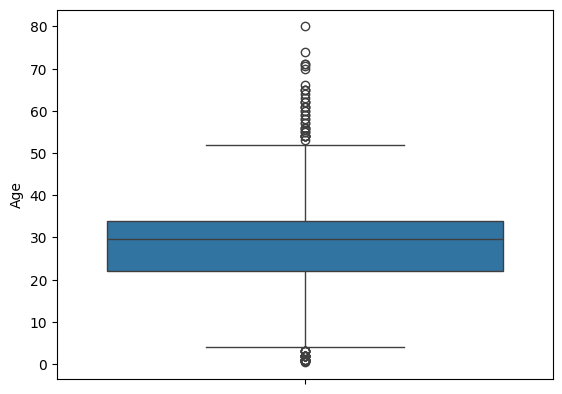

In [30]:
# sns.displot(df['Age'], kde= False, bins = 20)
sns.boxplot(y='Age', data= df )

In [34]:
### Finding the Boundary Values for Outliers
print("For Age")
upper_limit = df['Age'].mean() + 3*df['Age'].std()
lower_limit = df['Age'].mean() - 3*df['Age'].std()
print("Highest allowed",upper_limit)
print("Lowest allowed",lower_limit)
print(upper_limit,lower_limit)
## Applying the limits
df["Age"] = np.where (df["Age"] <lower_limit, lower_limit,df['Age'])
df["Age"] = np.where(df["Age"] >upper_limit, upper_limit,df['Age'])

For Age
Highest allowed 66.95568879540849
Lowest allowed -8.8376048597491
66.95568879540849 -8.8376048597491


In [35]:
print(df.shape)

(775, 11)


# Skewness

29.69911764705882
66.95568879540849
0.42
29.05902089238191
Age feature seems to be positively skewed....


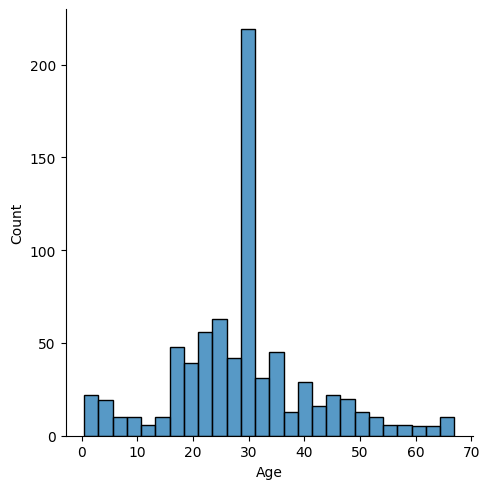

In [36]:
#Checking the skewness of Age
sns.displot(x='Age', data= df )
print(df['Age'].median())
print(df['Age'].max())
print(df['Age'].min())
print(df['Age'].mean())
print("Age feature seems to be positively skewed....")

13.0
65.0
0.0
17.82209070967742
Fare feature seems to be positively skewed....


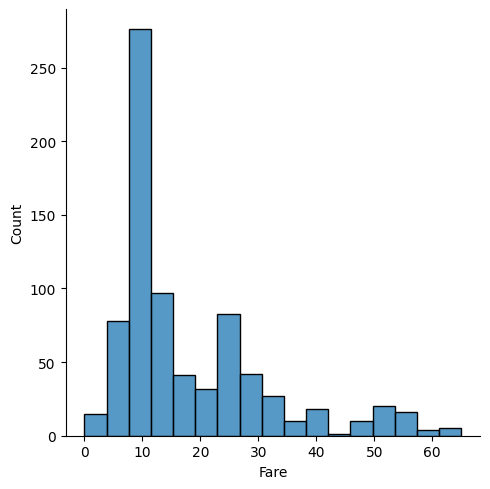

In [37]:
#Checking the skewness of Fare
sns.displot(x='Fare', data= df )
print(df['Fare'].median())
print(df['Fare'].max())
print(df['Fare'].min())
print(df['Fare'].mean())
print("Fare feature seems to be positively skewed....")

In [38]:
### Compute skewness
print(df['Age'].skew())
print("Age feature is more or less symmetric....")

0.3433170022867339
Age feature is more or less symmetric....


Following features are highly skewed


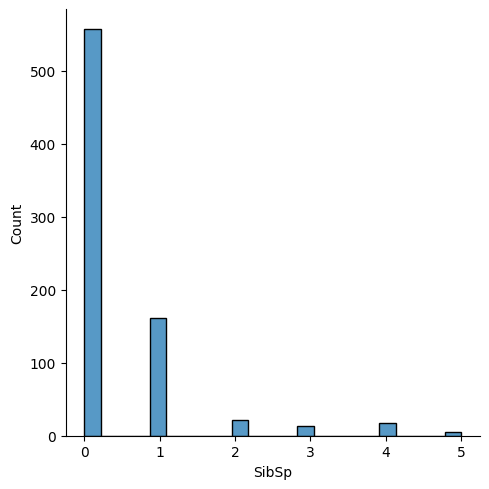

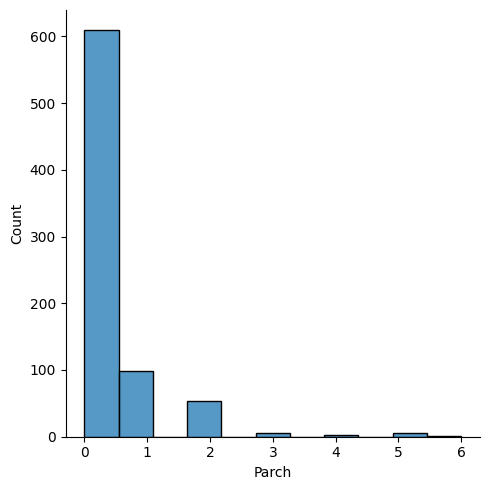

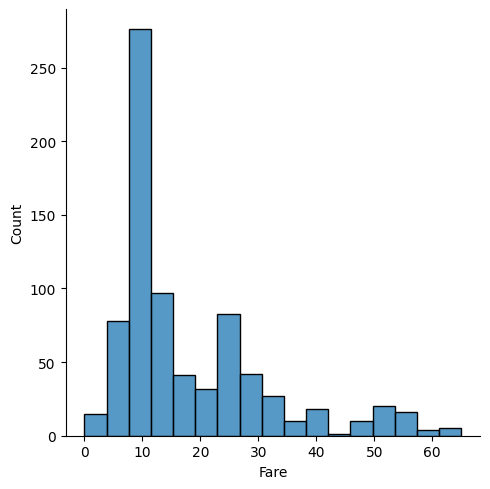

In [39]:
#Checking for other columns
print("Following features are highly skewed")
sns.displot(x='SibSp', data= df )
sns.displot(x='Parch', data= df )
sns.displot(x='Fare', data= df )

Following features are moderately skewed


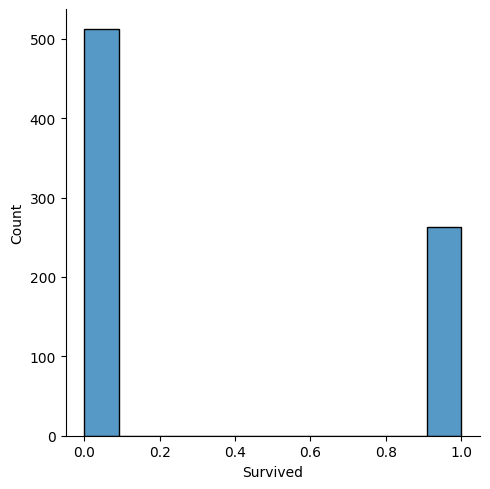

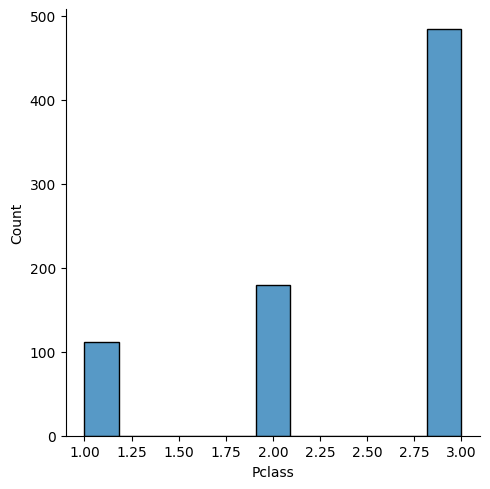

In [40]:
print("Following features are moderately skewed")
sns.displot(x='Survived', data= df)
sns.displot(x='Pclass', data= df)

Following feature is symmetric....Age


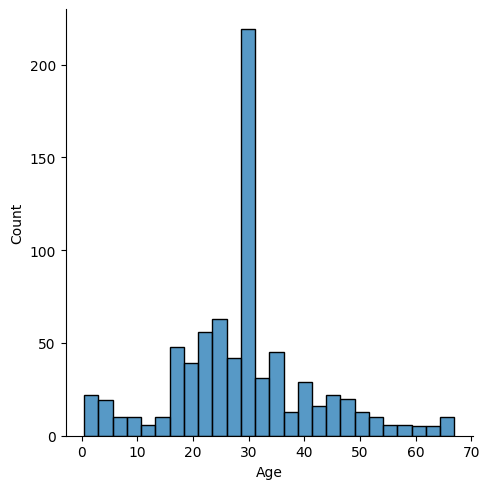

In [45]:
print("Following feature is symmetric....Age")
sns.displot(x='Age', data= df)

# Scaling

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
#for Fare column
y1 = df['Fare']
print(type(y1))
print(y1.max())
print(y1.min())
y1

<class 'pandas.core.series.Series'>
65.0
0.0


0       7.2500
2       7.9250
3      53.1000
4       8.0500
5       8.4583
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 775, dtype: float64

In [48]:
# (A) Min-Max Scaling (a=1, b=10)
a = 1
b = 10
y1_new = a + ( (y1-min(y1))/(max(y1)-min(y1)) * (b-a) )
print(y1_new.max())
print(y1_new.min())
# df['Fare'] = y1_new
y1_new

10.0
1.0


0      2.003846
2      2.097308
3      8.352308
4      2.114615
5      2.171149
         ...   
886    2.800000
887    5.153846
888    4.246923
889    5.153846
890    2.073077
Name: Fare, Length: 775, dtype: float64

In [49]:
# (A) Min-Max Scaling (a=0, b=1)
y1_new = (y1-min(y1))/(max(y1)-min(y1))
print(y1_new.max())
print(y1_new.min())
df['Fare'] = y1_new
y1_new

1.0
0.0


0      0.111538
2      0.121923
3      0.816923
4      0.123846
5      0.130128
         ...   
886    0.200000
887    0.461538
888    0.360769
889    0.461538
890    0.119231
Name: Fare, Length: 775, dtype: float64

In [50]:
#After scalling
print(df['Fare'].max())
print(df['Fare'].min())

1.0
0.0


In [51]:
# (B) Mean Normalization
# Still for Fare column
y1_new = (y1-np.mean(y1))/(max(y1)-min(y1))
print(y1_new.max())
print(y1_new.min())
print(np.mean(y1))
y1_new

0.7258139890818859
-0.2741860109181141
17.82209070967742


0     -0.162648
2     -0.152263
3      0.542737
4     -0.150340
5     -0.144058
         ...   
886   -0.074186
887    0.187352
888    0.086583
889    0.187352
890   -0.154955
Name: Fare, Length: 775, dtype: float64

In [54]:
# (C) Standardization (Z-score Normalization)
y1_new = (y1-np.mean(y1))/np.std(y1)
print(y1_new.max())
print(y1_new.min())
print(np.mean(y1_new))
print(np.std(y1_new))

3.476806553230618
-1.313410507243215
7.334634691717163e-17
0.9999999999999996


In [55]:
# (D) Robust Scaling
# Used when the data have many outliers
from scipy import stats 
IQR1 = stats.iqr (y1, interpolation = 'midpoint') 
y1_new = (y1-np.median(y1))/IQR1
print(y1_new.max())
print(y1_new.min())

2.8722616851338367
-0.7180654212834592


# Data Encoding

In [56]:
### (A) Label Encoding
from numpy import argmax
# define input string
data = 'joshua'
print(data)
# define universe of possible input values
alphabet = 'abcdefghijklmnopqrstuvwxyz '

joshua


In [57]:
# define a mapping of chars to integers
char_to_int = dict((c, i) for i, c in enumerate(alphabet))
int_to_char = dict((i, c) for i, c in enumerate(alphabet))

In [58]:
char_to_int

{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'j': 9,
 'k': 10,
 'l': 11,
 'm': 12,
 'n': 13,
 'o': 14,
 'p': 15,
 'q': 16,
 'r': 17,
 's': 18,
 't': 19,
 'u': 20,
 'v': 21,
 'w': 22,
 'x': 23,
 'y': 24,
 'z': 25,
 ' ': 26}

In [59]:
int_to_char

{0: 'a',
 1: 'b',
 2: 'c',
 3: 'd',
 4: 'e',
 5: 'f',
 6: 'g',
 7: 'h',
 8: 'i',
 9: 'j',
 10: 'k',
 11: 'l',
 12: 'm',
 13: 'n',
 14: 'o',
 15: 'p',
 16: 'q',
 17: 'r',
 18: 's',
 19: 't',
 20: 'u',
 21: 'v',
 22: 'w',
 23: 'x',
 24: 'y',
 25: 'z',
 26: ' '}

In [60]:
# integer encode input data
#encoding the my name 'joshua'
integer_encoded = [char_to_int[char] for char in data]
print(data, integer_encoded)

joshua [9, 14, 18, 7, 20, 0]


In [61]:
# (B) One hot encoding
onehot_encoded = []
for value in onehot_encoded:
	letter = [0 for _ in range(len(alphabet))]
	letter[value] = 1
	onehot_encoded.append(letter)
for i in range(len(onehot_encoded)):
    print(onehot_encoded[i])

In [62]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np

# Sample data
data = ['cat', 'dog', 'mouse', 'dog', 'cat', 'mouse']

# Step 1: Label Encoding (converts categories to integers)
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(data)

# Step 2: OneHot Encoding (converts integer encoded categories to one-hot vectors)
onehot_encoder = OneHotEncoder(sparse_output=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

# Step 3: Invert OneHot Encoding (decode back to original category)
def invert_encoding(onehot_encoded, label_encoder):
    # argmax gets the index of the maximum value (i.e., 1 in one-hot encoding)
    inverted_indices = np.argmax(onehot_encoded, axis=1)
    inverted_labels = label_encoder.inverse_transform(inverted_indices)
    return inverted_labels

# Invert specific encodings
print("Inverted for index 1:", invert_encoding(onehot_encoded[1].reshape(1, -1), label_encoder))
print("Inverted for index 4:", invert_encoding(onehot_encoded[4].reshape(1, -1), label_encoder))
print("Inverted for index 5:", invert_encoding(onehot_encoded[5].reshape(1, -1), label_encoder))

Inverted for index 1: ['dog']
Inverted for index 4: ['cat']
Inverted for index 5: ['mouse']


# Data Encoding using Classes for Encoding from sklearn.preprocessing

In [63]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# define example
data1 = ['cold','hot', 'warm', 'warm', 'hot','spring','sunny']
data2 = ['cold', 'cold', 'hot']
data3 = [ 'warm', 'warm', 'hot', 'sunny']
values1 = array(data1)
values2 = array(data2)
values3 = array(data3)
print(values1)
print(values2)
print(type(values3))

['cold' 'hot' 'warm' 'warm' 'hot' 'spring' 'sunny']
['cold' 'cold' 'hot']
<class 'numpy.ndarray'>


# LABEL ENCODING/INTEGER ENCODING

In [64]:
#Example of the column used before in the dataset
print(df['Embarked'].value_counts())  #Value count

Embarked
S    584
C    116
Q     75
Name: count, dtype: int64


In [65]:
print(df['Sex'].value_counts())  #Value count

Sex
male      531
female    244
Name: count, dtype: int64


In [66]:
print(df['Age'].value_counts())  #Value count

Age
29.699118    162
22.000000     24
28.000000     24
24.000000     23
19.000000     23
            ... 
66.000000      1
36.500000      1
55.500000      1
23.500000      1
34.500000      1
Name: count, Length: 84, dtype: int64


In [67]:
# LABEL ENCODING/INTEGER encode
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit (values1)

### Print Unique classes for data1
print(label_encoder.classes_)
print(type(label_encoder))

['cold' 'hot' 'spring' 'sunny' 'warm']
<class 'sklearn.preprocessing._label.LabelEncoder'>


In [70]:
data1 = ['cold','hot', 'warm', 'warm', 'hot','spring','sunny']
data2 = ['cold', 'cold', 'hot']
data3 = [ 'warm', 'warm', 'hot', 'sunny']
print(label_encoder.classes_)
# For mapping
labels2 = label_encoder.transform(values2)
print("For ", values2, ",labels are: ", labels2)
#
labels3 = label_encoder.transform(values3)
print("For ", values3, ",labels are: ", labels3)

test_labels = [0,0,1,1,4,4]
# getting reversely values2 again
values2_new = label_encoder.inverse_transform(test_labels)
print("For ", test_labels, ", the actual values are:", values2_new)

['cold' 'hot' 'spring' 'sunny' 'warm']
For  ['cold' 'cold' 'hot'] ,labels are:  [0 0 1]
For  ['warm' 'warm' 'hot' 'sunny'] ,labels are:  [4 4 1 3]
For  [0, 0, 1, 1, 4, 4] , the actual values are: ['cold' 'cold' 'hot' 'hot' 'warm' 'warm']


# ONE HOT ENCODING

In [72]:
#data1 = ['cold','hot', 'warm', 'warm', 'hot','spring','sunny']
### First get Label Encoding
integer_encoded = label_encoder.fit_transform(values1)
print("\n",integer_encoded)


 [0 1 4 4 1 2 3]


In [74]:
print(label_encoder.classes_)
print("For values", values1, "Label encdoing gives", integer_encoded, type(integer_encoded))

integer_encoded_new = integer_encoded.reshape(len(integer_encoded), 1)
print(integer_encoded.shape, integer_encoded_new.shape) 
print(integer_encoded, type(integer_encoded))

### Use Integer_encoded to get one-hot encoded 
onehot_encoder = OneHotEncoder(sparse_output=False)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded_new)
print("\n",onehot_encoded)

['cold' 'hot' 'spring' 'sunny' 'warm']
For values ['cold' 'hot' 'warm' 'warm' 'hot' 'spring' 'sunny'] Label encdoing gives [0 1 4 4 1 2 3] <class 'numpy.ndarray'>
(7,) (7, 1)
[0 1 4 4 1 2 3] <class 'numpy.ndarray'>

 [[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]]


# Encoding applied to our column in dataset

In [75]:
from sklearn.preprocessing import LabelEncoder

print(df['Sex'].unique())

sex_encoder = LabelEncoder()
print(df['Sex'])
sex_encoder.fit(df['Sex']) ### Mapping Table created
sex_values = sex_encoder.transform(df['Sex'])
print(sex_values)

df['Sex'] = sex_values

print(df['Sex'])

print(sex_encoder.classes_)  #Having male====1, female====0

['male' 'female']
0        male
2      female
3      female
4        male
5        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 775, dtype: object
[1 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 0 1 1 0 1 1 1 1 0 0 0
 0 1 0 0 1 1 0 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1
 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 0 1 0 0 1 1 1 0 1 1
 0 1 1 1 0 1 1 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1
 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 0 0 1 1 1
 0 0 1 1 1 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0
 1 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1
 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0 1 0 1 1 0 1
 0 1 1 0 1 0 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1
 1 1 0 0 1 1 0 0 1 0 1 1 0 1 0 1 0 1 1 1

In [ ]:
#After Label Encoding the sex column now have ====male to be '1' while female to be '0'

In [79]:
#Taking 5 rows from the dataframe of column Sex to make a list of encoding 
print("Before Encoding:", list(df['Sex'][-5:]))
print("After Encoding:", sex_values[-5:])

#Taking 10 rows from the dataframe of column Sex to make a list of encoding
print("The inverse from the encoding for", sex_values[:10])
print("The inverse from the encoding result:", sex_encoder.inverse_transform(sex_values[:10]))

Before Encoding: [1, 0, 0, 1, 1]
After Encoding: [1 0 0 1 1]
The inverse from the encoding for [1 0 0 1 1 1 1 0 0 0]
The inverse from the encoding result: ['male' 'female' 'female' 'male' 'male' 'male' 'male' 'female' 'female'
 'female']


In [ ]:
######

# Principal Component Analysis..(PCA)

In [80]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
%matplotlib inline

In [82]:
data = pd.read_csv("Titanic_train.csv")
data.shape

(891, 12)

In [99]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#Principal Component Analysis

In [100]:
# Drop non-numeric columns and columns with missing values
numeric_columns = data.select_dtypes(include=['number']).columns
titanic_numeric = data[numeric_columns].dropna()

In [101]:
# Apply PCA

scaler = StandardScaler()
Titanic_scaled = scaler.fit_transform(titanic_numeric)

pca = PCA(n_components=2)  # We choose to reduce to 2 components for visualization
Titanic_pca = pca.fit_transform(Titanic_scaled)

In [102]:
#Createing a DataFrame for visualization or further analysis
pca_df = pd.DataFrame(data=Titanic_pca, columns=['PC1', 'PC2'])

In [103]:
# Output the result
print(pca_df.head())

        PC1       PC2
0 -1.540692  0.298783
1  1.843096  0.145285
2 -0.562025 -0.165859
3  1.588661  0.167715
4 -1.220717 -0.772606


In [104]:
pca_df['Survived'] = titanic_numeric['Survived']

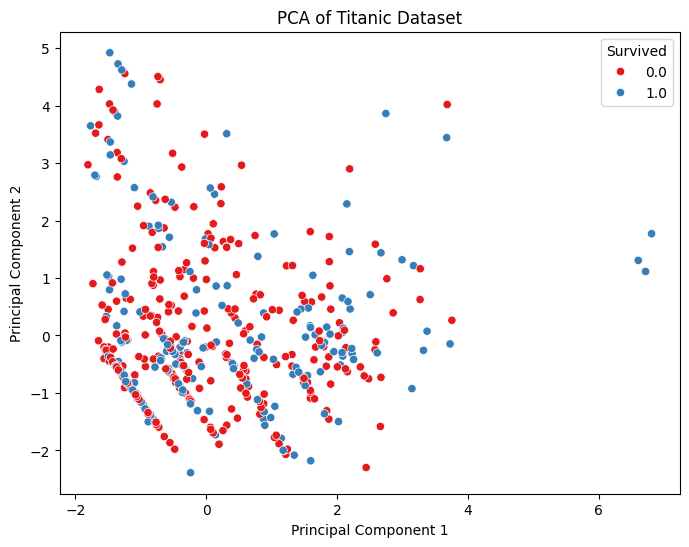

In [105]:
# Visualize PCA components
import matplotlib.pyplot as plt
import seaborn as sns
 
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Survived', data=pca_df, palette='Set1')
plt.title('PCA of Titanic Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Survived', loc='upper right')
plt.show()

# Making a heatmap with the default parameters.
# We will be creating a 10×10 2-D data using the randint() function of the NumPy module.

The data to be plotted:

[[ 7 77  4 71 62 73 99 91 49 93]
 [62 80 20 98 14 87 57 75 94 56]
 [52 32 30 44 38 11 63 50 53 51]
 [11 58  8 86 87 80 96 86 17 27]
 [85 90 37 29  3 57 50 89 47 85]
 [93 78 81 94 51 95 79 14 88 17]
 [29 25  7  9 54 16 41 46 57 13]
 [66 54 74 67 58 61 29 50 51 25]
 [62 36 13 89 37 59 65 88 78 15]
 [46 66 35 82 66 70 51 51 98 16]]


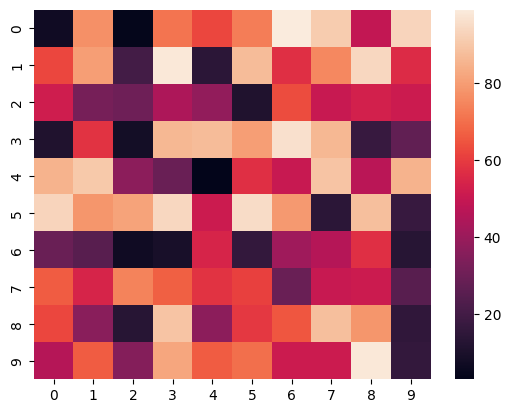

In [106]:
# importing the modules 
import numpy as np 
import seaborn as sn 
import matplotlib.pyplot as plt 
# generating 2-D 10x10 matrix of random numbers 
# from 1 to 100 
data = np.random.randint(low = 1, high = 100, size = (10, 10)) 
print("The data to be plotted:\n") 
print(data) 
# plotting the heatmap 
hm = sn.heatmap(data = data) 
# displaying the plotted heatmap 
plt.show()

looking at the cmap parameter. 
Matplotlib provides us with multiple colormaps, you can look at all of them here. In this example,
i will be using tab20.

Centering the cmap to 0 by passing the center parameter as 0.

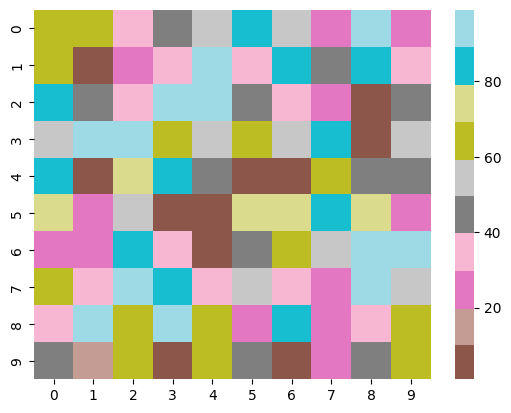

In [108]:
# importing the modules 
import numpy as np 
import seaborn as sn 
import matplotlib.pyplot as plt 

# generating 2-D 10x10 matrix of random numbers 
# from 1 to 100 
data = np.random.randint(low=1, 
						high=100, 
						size=(10, 10)) 

# setting the parameter values 
cmap = "tab20"
center = 0

# plotting the heatmap 
hm = sn.heatmap(data=data, 
				cmap=cmap, 
				center=center) 

# displaying the plotted heatmap 
plt.show()

# Recursive Feature Elimination

In [109]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
 
# Load dataset
# Titanic_train.csv')
titanic_data = pd.read_csv('Titanic_train.csv')
 
# Preprocessing: Convert categorical variables into numerical ....which is Sex & Embarked
titanic_data = pd.get_dummies(titanic_data, columns=['Sex', 'Embarked'])
 
# Drop unnecessary columns or columns that can't be used for prediction
titanic_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
 
# Handle missing values
titanic_data.fillna(titanic_data.mean(), inplace=True)
 
# Split data into features and target variable
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']
 
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 
# Create a base model
model = RandomForestClassifier(random_state=42)
 
# Create the RFE model and select 5 attributes
rfe = RFE(model, n_features_to_select=5)
 
# Fit the RFE model to the training data
rfe.fit(X_train, y_train)
 
# Print the selected features
selected_features = X.columns[rfe.support_]
print("Selected features:", selected_features)
 
# Evaluate the model using selected features
X_train_selected = rfe.transform(X_train)
X_test_selected = rfe.transform(X_test)
 
model.fit(X_train_selected, y_train)
predictions = model.predict(X_test_selected)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy with selected features:", accuracy)

Selected features: Index(['Pclass', 'Age', 'Fare', 'Sex_female', 'Sex_male'], dtype='object')
Accuracy with selected features: 0.7932960893854749


# Feature Selection using Filter based methods

1. Pearson Correlation
2. Chi squared
3. Mutual Information Gain
4. Selecting K best features

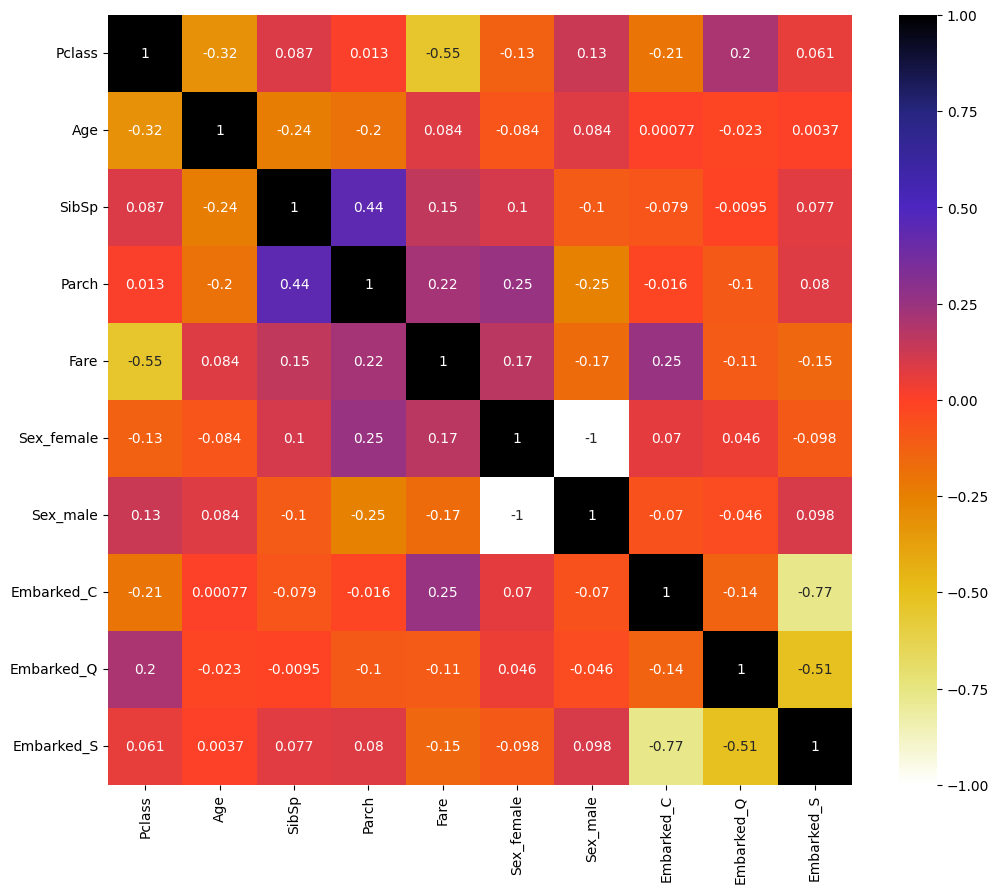

In [110]:
# Using Pearson Correlation
### Unsupervised
import seaborn as sns
cor = X_train.corr()
plt.figure(figsize=(12,10))
sns.heatmap(cor, cmap=plt.cm.CMRmap_r,annot=True)
plt.show()

In [111]:
# Finding the correlated features
def correlation(dataset, threshold):
    corr_pairs = tuple() 
    all_pairs = []
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                print(abs(corr_matrix.iloc[i, j]))
                corr_pairs = (corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j])  
                all_pairs.append(corr_pairs)
    return all_pairs

In [116]:
# Which features have maximum correlation?
# Default =
corr_feature_pairs = correlation(X_train, 0.6)
corr_feature_pairs

1.0
0.7732052680256163


[('Sex_male', 'Sex_female', -1.0),
 ('Embarked_S', 'Embarked_C', -0.7732052680256163)]

In [117]:
corr_features = ['Parch', 'Fare']

In [118]:
print(X_train.shape)
print(X_test.shape)

(712, 10)
(179, 10)


In [119]:
# Removing correlated features
print(X_train.shape)
print(X_test.shape)
X_train.drop(corr_features,axis=1) # inplace=True)
X_test.drop(corr_features,axis=1) # inplace=True)
print(X_train.shape)
print(X_test.shape)

(712, 10)
(179, 10)
(712, 10)
(179, 10)


In [120]:
# (B) Chi-square
# Perform chi2 test
## Supervised method
from sklearn.feature_selection import chi2
# Calculating Fscore and p value
f_p_values=chi2(X_train,y_train)
f_p_values

(array([2.14788625e+01, 1.22823512e+01, 4.02913953e+00, 7.20641836e+00,
        3.58477807e+03, 1.37061416e+02, 7.19058821e+01, 1.49581186e+01,
        2.42391645e-02, 3.79041959e+00]),
 array([3.57750429e-06, 4.57261921e-04, 4.47207448e-02, 7.26433168e-03,
        0.00000000e+00, 1.16912602e-31, 2.25710127e-17, 1.09924062e-04,
        8.76277915e-01, 5.15467253e-02]))

The chi-square (χ²) function is a statistical measure used to compare observed data with expected data. It's particularly useful in hypothesis testing and assessing the goodness-of-fit of a model to observed data.

In general, the formula for the chi-square statistic is:

χ² = Σ((O - E)² / E)

Where:

χ² is the chi-square statistic. O is the observed frequency. E is the expected frequency. Σ denotes the sum over all categories or cells. The chi-square test is often used to determine whether there is a significant association between two categorical variables. It compares observed frequencies to expected frequencies under the assumption of independence between the variables.
## If the observed frequencies significantly differ from the expected frequencies, the chi-square statistic will be large, indicating that the variables are likely dependent.

## The chi-square test is commonly used in fields such as biology, psychology, sociology, and market research, amo

In [121]:
# Representing F score and the second array is for p- values in list form
import pandas as pd
p_values=pd.Series(f_p_values[1])
p_values.index=X_train.columns       # setting indexes as column names 
p_values 

Pclass        3.577504e-06
Age           4.572619e-04
SibSp         4.472074e-02
Parch         7.264332e-03
Fare          0.000000e+00
Sex_female    1.169126e-31
Sex_male      2.257101e-17
Embarked_C    1.099241e-04
Embarked_Q    8.762779e-01
Embarked_S    5.154673e-02
dtype: float64

In [122]:
p_values.sort_index(ascending=False)
print(p_values)
# The upper columns are most important 
# So, lower ones can be removed

Pclass        3.577504e-06
Age           4.572619e-04
SibSp         4.472074e-02
Parch         7.264332e-03
Fare          0.000000e+00
Sex_female    1.169126e-31
Sex_male      2.257101e-17
Embarked_C    1.099241e-04
Embarked_Q    8.762779e-01
Embarked_S    5.154673e-02
dtype: float64


In [123]:
## (C) feature selection by using mutual Information Gain
# Importing mutual information gain
## Supervised
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
print(mutual_info)
print(X_train.columns)
## The higher the value the more important that feature will be or you can say that the dependency of 
## that independent feature will be more on the dependent feature.

[0.05294381 0.01795277 0.04075878 0.03632627 0.09619663 0.14738503
 0.15239554 0.01981768 0.         0.00478679]
Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


In [124]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

'''
Mutual information methods can capture any kind of statistical dependency, 
but being nonparametric, they require more samples for accurate estimation.
'''

'\nMutual information methods can capture any kind of statistical dependency, \nbut being nonparametric, they require more samples for accurate estimation.\n'

<Axes: >

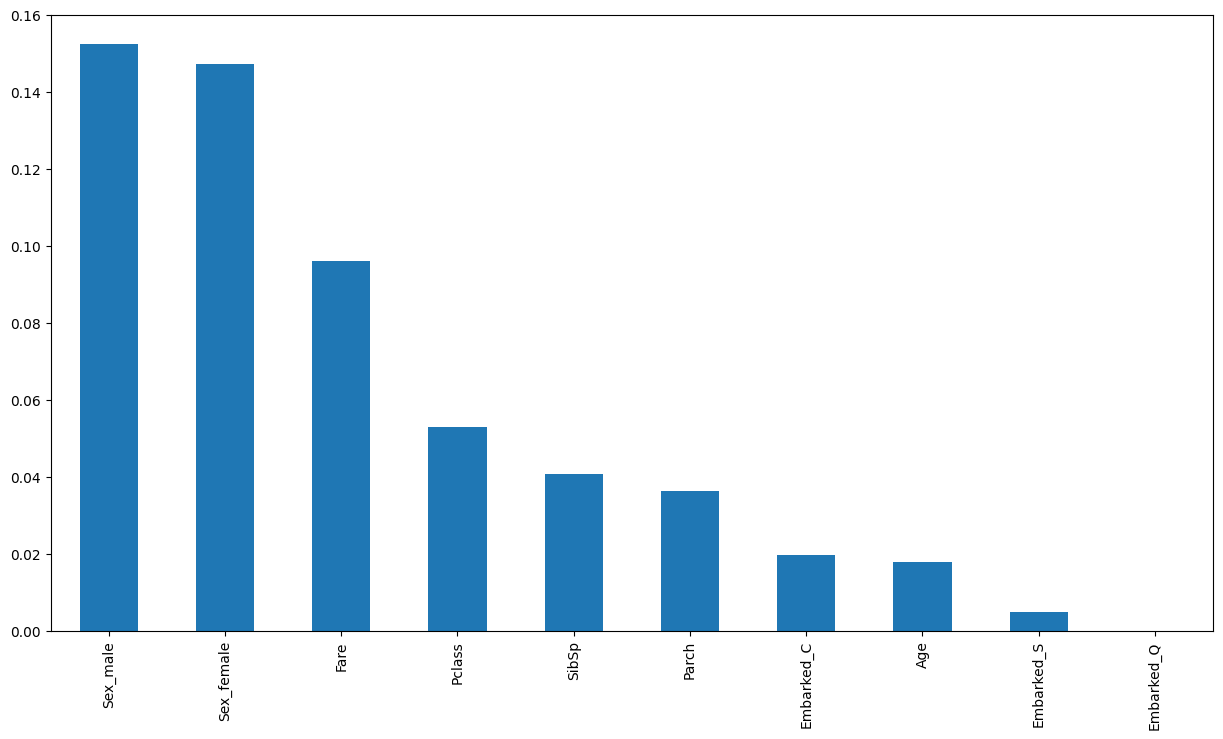

In [125]:
# plotting the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15, 8))

In [126]:
# Selecting k best features
from sklearn.feature_selection import SelectKBest
#No we Will select the top k important features
sel_five_cols = SelectKBest(mutual_info_classif, k=6)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['Pclass', 'Age', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_S'], dtype='object')

In [127]:
## Removing features with low variance
## As an example, suppose that we have a dataset with boolean features, and we want to remove all features that are either 
## one or zero (on or off) in more than 80% of the samples
## VAR[x] = p (1-p)
## Setting threshold .8 * (1 - .8), if features with 80% or more columns with same (0 or 1) are to be removed
from sklearn.feature_selection import VarianceThreshold
X_t = [[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(X_t)

array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])